Python Implementation of the Christofides Algorithm

Kara Martin

Implemented in Java in April 2020, translated to Python in November 2020

THE CHRISTOFIDES ALGORITHM
1.  Create a Minimum Spanning Tree (MST) T of Weighted Graph G.
2.  Let O be the set of odd degree vertices in T. 
    By the Handshaking Lemma, O has an even number of vertices.
3.  Find a minimum-weight Perfect Matching M in the induced subgraph S
    given by the vertices from O.
4.  Combine the edges of M and T to form a connected multigraph H
    in which each vertex has even degree.
5.  Form an Eulerian circuit in H.
6.  Make the circuit found in Step 5 into a Hamiltonian circuit by 
    skipping repeated vertices (aka shortcutting). 

This provides an approximate solution to the Traveling Salesman Problem
which is guaranteed to be no longer than 1.5x |MST|. 

In [17]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
#from matplotlib.animation import FuncAnimation
import time

Animate = False
LargeGraph = False

def filter_node(n):
    return T.degree(n) % 2 == 1

def getOriginalWeight(u, v):
    return G[u][v]['weight']

# Data must hold to the triangle inequality or else results are not guaranteed
adj = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/wg59_dist.txt"
labels = "https://people.sc.fsu.edu/~jburkardt/datasets/cities/wg59_name.txt"

adjMatrix = np.loadtxt(adj, dtype=int)
G = nx.from_numpy_matrix(adjMatrix, parallel_edges=False)

#print("Nodes: ", G.nodes())
#print("Edges: ", G.edges(data=True))

headers = pd.read_table(labels, comment="#", header=None)
h = []
for row in headers.iterrows():
    h.append(row[1][0])

Step 0: Connected Graph from Adjacency Matrix
59 cities


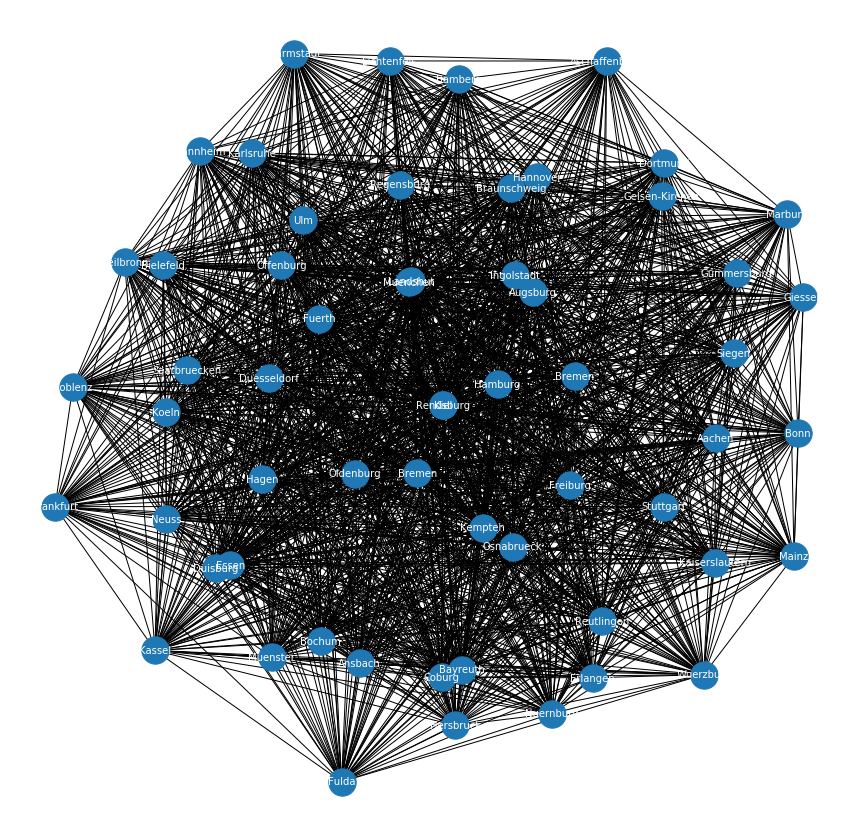

In [21]:
# Step 0: Display original connected graph
plt.figure(3,figsize=(15,15)) 

# nodes
if LargeGraph:
    posG = nx.spring_layout(G, k=0.95, iterations=5, weight='weight')         # positions for all nodes
else:
    posG = nx.spring_layout(G, k=0.2, iterations=100, weight='weight')        
nx.draw_networkx_nodes(G, posG, node_size=750)

# edges
nx.draw_networkx_edges(G, posG, width=1)

# labels
mappingG = dict(zip(G, h))
nx.draw_networkx_labels(G, posG, mappingG, font_size=10, font_family="sans-serif", font_color='white')

print("Step 0: Connected Graph from Adjacency Matrix")
print(G.number_of_nodes(), "cities")
plt.axis("off")
plt.show()

Step 1: Minimum Spanning Tree T (Red Lines)
Total Cost of MST:  833


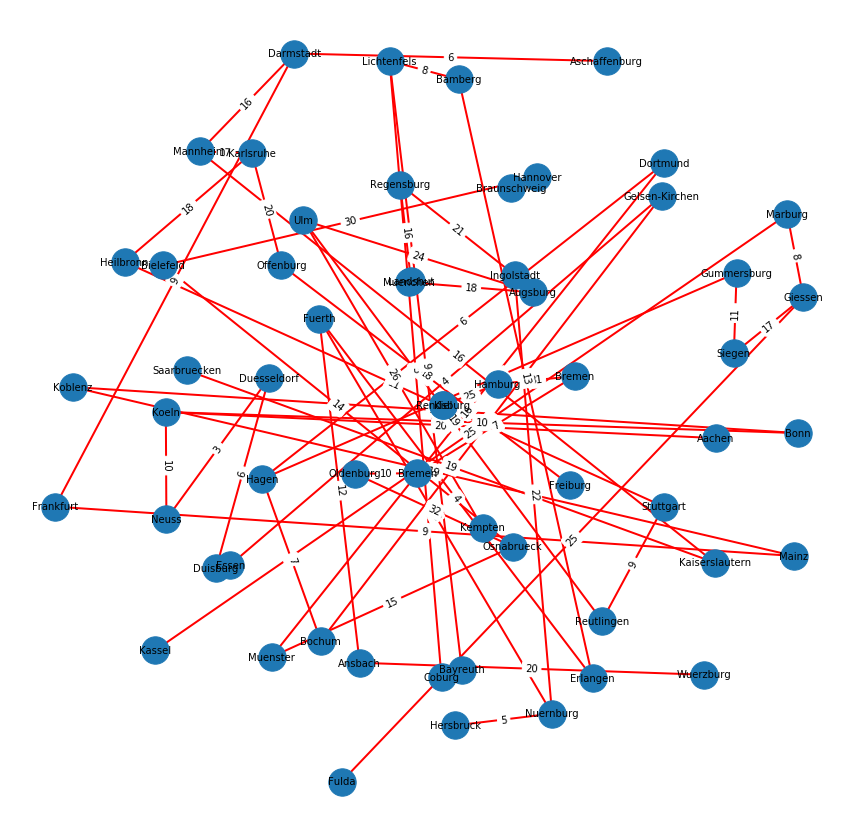

In [22]:
# Step 1: MST
T = nx.minimum_spanning_tree(G)
#print(T.edges(data=True))

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx_nodes(T, posG, node_size=750)
nx.draw_networkx_edges(T, posG, width=2, edge_color='red')

weightLabelsT = nx.get_edge_attributes(T, 'weight')
nx.draw_networkx_edge_labels(T, posG, edge_labels=weightLabelsT)

mappingT = dict(zip(T, h))
nx.draw_networkx_labels(T, posG, mappingT, font_size=10, font_family="sans-serif", font_color='black')

print("Step 1: Minimum Spanning Tree T (Red Lines)")
MSTCost = sum(weightLabelsT.values())
print("Total Cost of MST: ", MSTCost)

plt.axis("off")
plt.show()

Step 2: Induced Subgraph S (Red Lines) of Odd Degree Vertices O (Green Nodes)


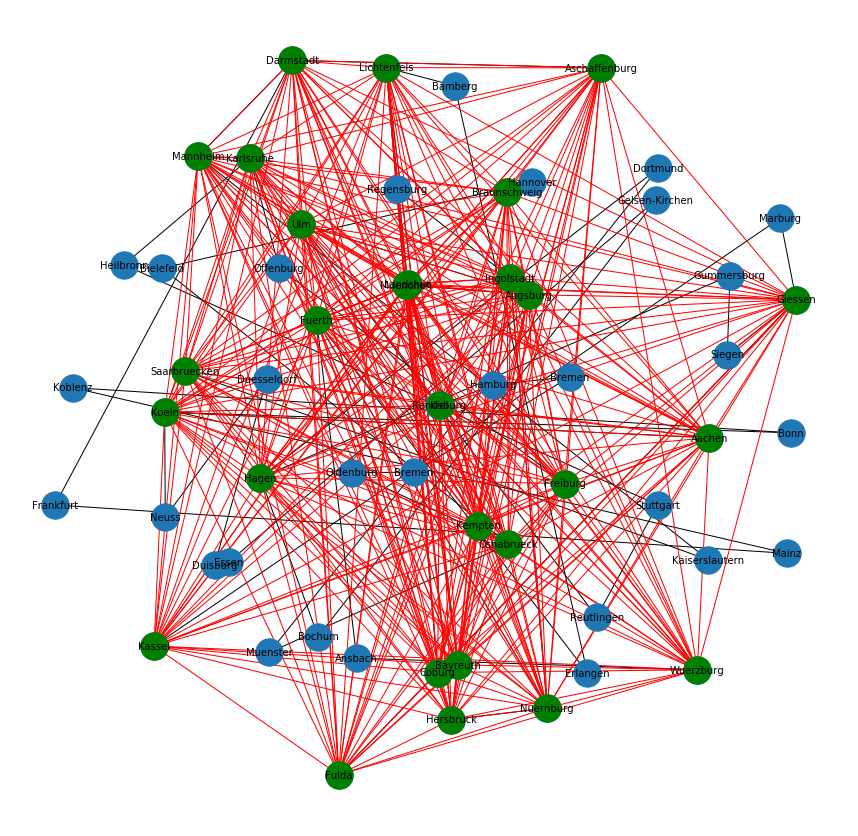

In [23]:
# Step 2: Odd Degree Vertices
print("Step 2: Induced Subgraph S (Red Lines) of Odd Degree Vertices O (Green Nodes)")
O = nx.subgraph_view(T, filter_node=filter_node)
S = nx.Graph(G.subgraph(O.nodes()).edges(data=True))
#print(S.nodes(), S.edges(data=True))

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx_nodes(T, posG, node_size=750)
nx.draw_networkx_edges(T, posG, width=1, edge_color='black')
nx.draw_networkx_labels(T, posG, mappingT, font_size=10, font_family="sans-serif", font_color='black')

nx.draw_networkx_nodes(S, posG, node_size=750, node_color='green')
nx.draw_networkx_edges(S, posG, width=1, edge_color='red')

plt.axis("off")
plt.show()

Step 3: Minimum-Weight Perfect Matching M (Red Lines)
Total Cost of Perfect Matching M:  359


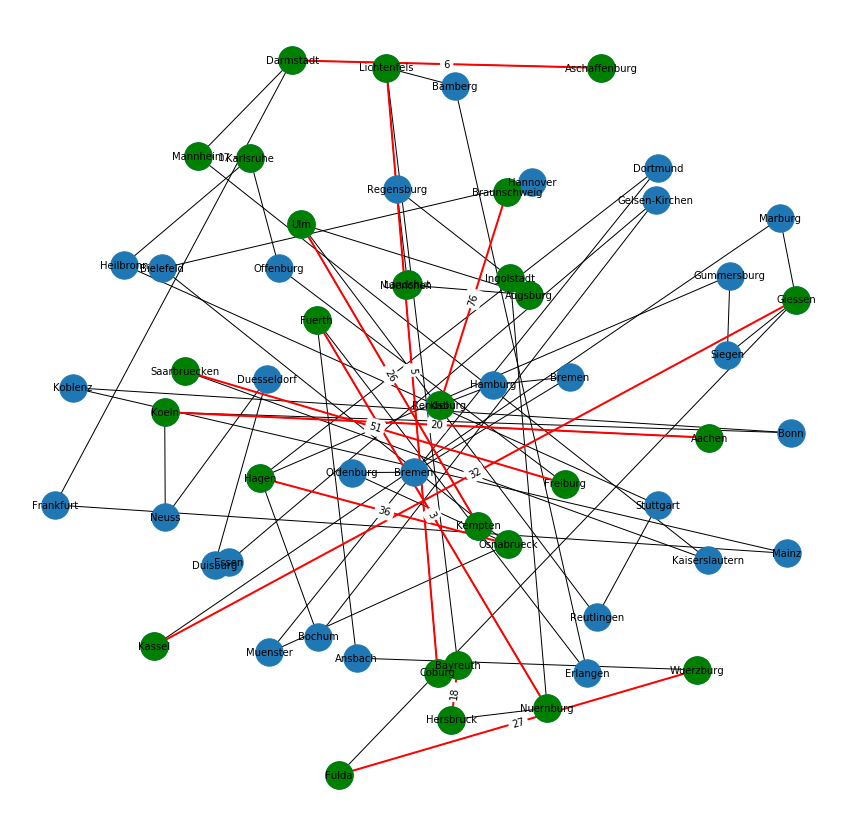

In [24]:
# Step 3: Perfect Matching M
# Multiply weights by -1 to get min-weight perfect matching
for u,v,d in S.edges(data=True):
    S[u][v]['weight'] = -1 * S[u][v]['weight']
    
perfectMatching = nx.max_weight_matching(S, maxcardinality=True, weight='weight')
MCost = 0
M = nx.Graph()
for (u,v) in perfectMatching:
    w = getOriginalWeight(u,v)
    M.add_edge(u, v, weight=w)
    MCost += w
#print(M.edges(data=True))

print("Step 3: Minimum-Weight Perfect Matching M (Red Lines)")
print("Total Cost of Perfect Matching M: ", MCost)

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx_nodes(T, posG, node_size=750)
nx.draw_networkx_edges(T, posG, width=1, edge_color='black')
nx.draw_networkx_labels(T, posG, mappingT, font_size=10, font_family="sans-serif", font_color='black')

nx.draw_networkx_nodes(M, posG, node_size=750, node_color='green')
nx.draw_networkx_edges(M, posG, perfectMatching, width=2, edge_color='red')

nx.draw_networkx_edge_labels(M, posG, edge_labels=nx.get_edge_attributes(M, 'weight'))

plt.axis("off")
plt.show()

Step 4: Even Connected Multigraph H (T + M)
Total Cost of H:  1192


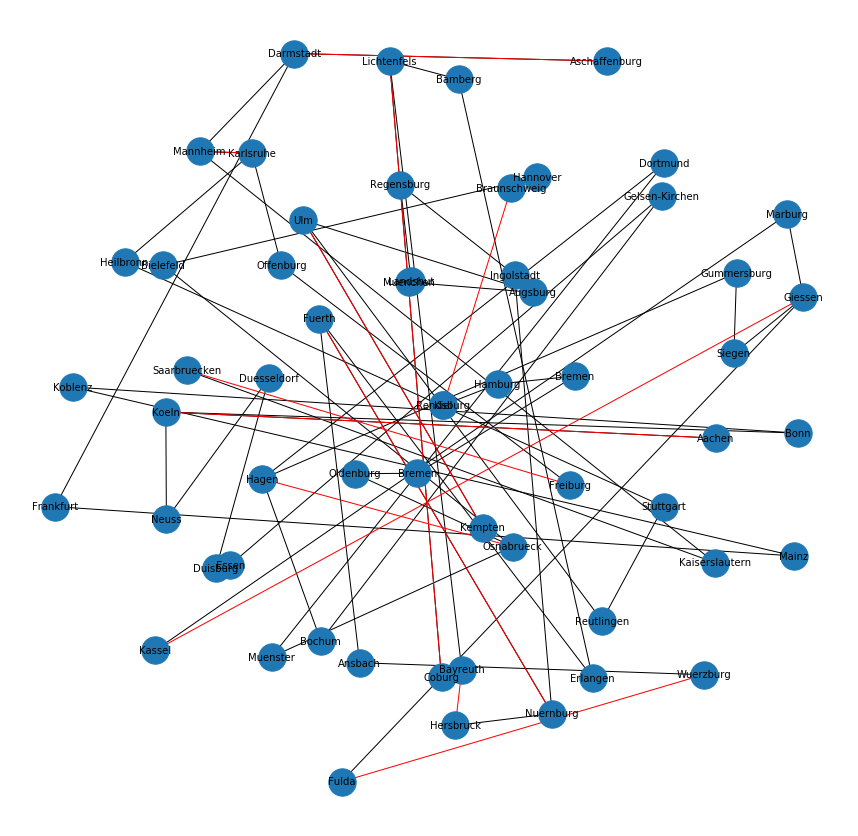

In [25]:
# Step 4: Even Connected Multigraph H (T + M)
H = nx.MultiGraph(T.edges(data=True))

# Add Edges from M
H.add_edges_from(M.edges(data=True))
#print(H.edges(data=True))

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx_nodes(H, posG, node_size=750)
nx.draw_networkx_edges(T, posG, width=1, edge_color='black')
nx.draw_networkx_edges(M, posG, width=1, edge_color='red', connectionstyle='arc3, rad=0.1')
nx.draw_networkx_labels(H, posG, mappingT, font_size=10, font_family="sans-serif", font_color='black')
# Edge weight labels look best on smaller maps with less crowding
# nx.draw_networkx_edge_labels(H, posG, edge_labels=nx.get_edge_attributes(T, 'weight'))
# nx.draw_networkx_edge_labels(H, posG, edge_labels=nx.get_edge_attributes(M, 'weight'))

print("Step 4: Even Connected Multigraph H (T + M)")
print("Total Cost of H: ", MSTCost + MCost)
plt.axis("off")
plt.show()

In [26]:
# Step 5: Eulerian circuit in H
eulerCircuit = [(u,v) for u, v in nx.eulerian_circuit(H)]
print(eulerCircuit)

# Return: Cost of whole circuit
def AnimateCircuit(Graph, Pos, Labels, Circuit, Message):
    totalCost = 0
    plt.figure(3,figsize=(15,15)) 
    AnimationMultigraph = nx.MultiGraph()
    for x in range(len(Circuit)):
        print(Message)            
        
        nextEdge = Circuit[x]
        if nextEdge[0] < nextEdge[1]:
            uEdges = Graph.edges(nextEdge[0])
            vEdges = [(v,u) for u,v in Graph.edges(nextEdge[1])]
        else:
            uEdges = Graph.edges(nextEdge[1])
            vEdges = [(v,u) for u,v in Graph.edges(nextEdge[0])]
        intersection = [e for e in uEdges for f in vEdges if e == f]

        plt.figure(3,figsize=(15,15)) 
        nx.draw_networkx_nodes(Graph, Pos, node_size=750)
        nx.draw_networkx_labels(Graph, Pos, Labels, font_size=10, font_family="sans-serif", font_color='black')
        if x > 0:
            nx.draw_networkx_edges(Graph, Pos, AnimationMultigraph.edges(), width=1, edge_color='black')
        nx.draw_networkx_edges(Graph, Pos, intersection, width=2, edge_color='red')

        totalCost += G[nextEdge[0]][nextEdge[1]]["weight"]
        AnimationMultigraph.add_edges_from(intersection)
        plt.axis("off")
        plt.show()
        time.sleep(0.1)
        clear_output(wait=True)
    return totalCost

if Animate and not LargeGraph:
    ECost = AnimateCircuit(H, posG, mappingT, eulerCircuit, "Step 5: Eulerian Circuit in H ")
else:
    ECost = 0
    for x in eulerCircuit:
        ECost += getOriginalWeight(x[0], x[1])

[(0, 28), (28, 14), (14, 28), (28, 56), (56, 27), (27, 10), (10, 12), (12, 52), (52, 12), (12, 54), (54, 6), (6, 57), (57, 11), (11, 52), (52, 4), (4, 32), (32, 4), (4, 43), (43, 19), (19, 15), (15, 35), (35, 16), (16, 30), (30, 16), (16, 22), (22, 40), (40, 41), (41, 5), (5, 46), (46, 2), (2, 48), (48, 39), (39, 21), (21, 55), (55, 24), (24, 37), (37, 3), (3, 8), (8, 26), (26, 51), (51, 36), (36, 9), (9, 1), (1, 55), (55, 48), (48, 47), (47, 58), (58, 7), (7, 13), (13, 53), (53, 7), (7, 44), (44, 29), (29, 31), (31, 45), (45, 42), (42, 33), (33, 18), (18, 38), (38, 18), (18, 34), (34, 49), (49, 23), (23, 45), (45, 23), (23, 50), (50, 0), (0, 50), (50, 25), (25, 17), (17, 20), (20, 0)]


In [27]:
print("Total Cost of Eulerian Circuit: ", ECost)

Total Cost of Eulerian Circuit:  1192


In [28]:
# Step 6:  Shortcut Eulerian circuit until it's a Hamiltonian circuit.
eulerianCircuitUNodes = [u for u,v in eulerCircuit]

visited = [0] * G.number_of_nodes()
visited[eulerianCircuitUNodes[0]] = 1
hamiltonianCircuit = [eulerianCircuitUNodes[0]]
counter = 0

for x in eulerCircuit:
    if(visited[x[0]] == 0):
        hamiltonianCircuit.append(x[0])
    visited[x[0]] = 1
        
hamiltonianCircuit.append(hamiltonianCircuit[0])

print("Eulerian Circuit:    ")
print(eulerianCircuitUNodes)
print()
print("Hamiltonian Circuit: ")
print(hamiltonianCircuit)

Eulerian Circuit:    
[0, 28, 14, 28, 56, 27, 10, 12, 52, 12, 54, 6, 57, 11, 52, 4, 32, 4, 43, 19, 15, 35, 16, 30, 16, 22, 40, 41, 5, 46, 2, 48, 39, 21, 55, 24, 37, 3, 8, 26, 51, 36, 9, 1, 55, 48, 47, 58, 7, 13, 53, 7, 44, 29, 31, 45, 42, 33, 18, 38, 18, 34, 49, 23, 45, 23, 50, 0, 50, 25, 17, 20]

Hamiltonian Circuit: 
[0, 28, 14, 56, 27, 10, 12, 52, 54, 6, 57, 11, 4, 32, 43, 19, 15, 35, 16, 30, 22, 40, 41, 5, 46, 2, 48, 39, 21, 55, 24, 37, 3, 8, 26, 51, 36, 9, 1, 47, 58, 7, 13, 53, 44, 29, 31, 45, 42, 33, 18, 38, 34, 49, 23, 50, 25, 17, 20, 0]


Step 6: Hamiltonian circuit


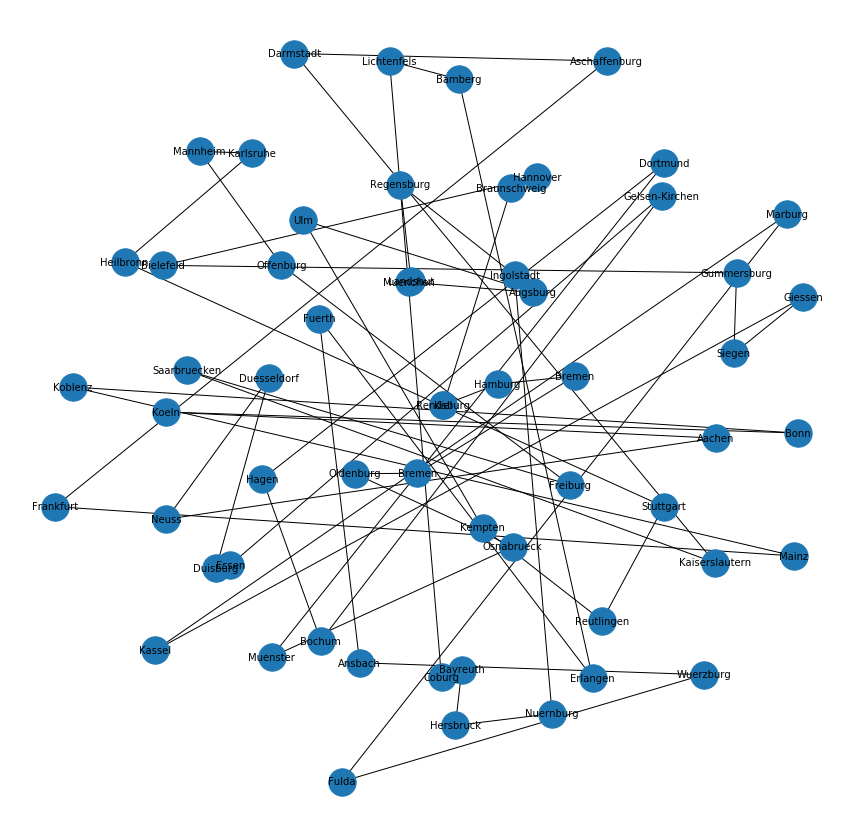

Total Cost of Hamiltonian Circuit:  1096


In [29]:
hamCirc = [(hamiltonianCircuit[x],hamiltonianCircuit[x + 1]) for x in range(len(hamiltonianCircuit) - 1)]

msg = "Step 6: Hamiltonian circuit"

C = nx.Graph()
C.edges(data=True)
for (u,v) in hamCirc:
    w = getOriginalWeight(u,v)
    C.add_edge(u, v)
    C[u][v]['weight'] = w
#print(C.edges(data=True))

# Final shortcutted Hamiltonian Path may use edges that don't exist in H
# So instead we process it with the original connected graph G

# Animate = False

if Animate and not LargeGraph:
    HCost = AnimateCircuit(H, posG, mappingT, hamCirc, msg)
else:
    print("Step 6: Hamiltonian circuit")
    plt.figure(3,figsize=(15,15)) 
    nx.draw_networkx_nodes(C, posG, node_size=750)
    nx.draw_networkx_labels(C, posG, mappingT, font_size=10, font_family="sans-serif", font_color='black')
    nx.draw_networkx_edges(C, posG, C.edges(), width=1, edge_color='black')
    plt.axis("off")
    plt.show()
    HCost = sum(nx.get_edge_attributes(C, 'weight').values())
    print("Total Cost of Hamiltonian Circuit: ", HCost)

In [30]:
print("Analysis:")
print("Total Cost of MST: ", MSTCost)
print("1.5x MSTCost: ", 1.5*MSTCost)
print("Total Cost of Hamiltonian Circuit: ", HCost)

Analysis:
Total Cost of MST:  833
1.5x MSTCost:  1249.5
Total Cost of Hamiltonian Circuit:  1096


To Do:
  * Better Animation via FuncAnimation
  * Curved lines for Multigraph H when two nodes share two edges
  * Adaptive graph type (circular vs spring?)
  * Graphing on real world maps 
  * Optimize some of the graph copying